In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
# print(np.zeros(100))
dataTrain=pd.read_csv('C:\\Users\\HP\\OneDrive\\Desktop\\WorkSem3\\CS215\\assignment3\\cs-215-assignment-3-multiple-variate-regression\\train.csv')
numSamples,features=dataTrain.shape[0],dataTrain.shape[1]-2
x_train=dataTrain.iloc[:,1:-1].values
y_train=dataTrain.iloc[:,-1].values
print(x_train.shape[0])

15000


In [6]:
def KernelRegression(X_train,Y_train,X_test,bandwidth):
    Y_pred = np.zeros(X_test.shape[0])
    
    for i in range(X_test.shape[0]):
        distances = np.linalg.norm(X_train - X_test[i], axis=1)
        weights = gaussian_kernel(distances, bandwidth)
        weights_sum = np.sum(weights)
        
        if weights_sum > 0:
            Y_pred[i] = np.sum(weights * Y_train) / weights_sum
        else:
            Y_pred[i] = np.mean(Y_train)
    
    return Y_pred

def OLS(X,Y):
    X_b=np.concatenate([np.ones((X.shape[0],1)),X],axis=1)
    beta=np.linalg.inv((X_b.T).dot(X_b)).dot(X_b.T).dot(Y)
    return beta

def gaussian_kernel(distance, bandwidth):
    return np.exp(-0.5 * (distance / bandwidth) ** 2)

def MAE():
    pass

bandwidth = 1.0  # You can tune this
beta_ols = OLS(x_train, y_train)
print("OLS Coefficients:", beta_ols)
Y_pred_kernel = KernelRegression(x_train, y_train, x_train, bandwidth)

OLS Coefficients: [-2.76404705e+03  6.14588182e-03 -1.49178606e+00  2.37551314e+00
  8.75568393e+01  2.50217691e+01  9.09304413e+01  5.92649249e+03
  5.53468466e+03 -6.82049253e+02 -1.60335932e+01 -2.48950823e+04
 -1.44143525e+01  4.77793761e+00 -5.10292525e+02  1.28154103e+04
 -1.37514176e+03  8.50667650e+01]


In [7]:
def mean_absolute_error(Y_true, Y_pred):
    return np.mean(np.abs(Y_true - Y_pred))

# Compute MAE for OLS predictions (using X_train as example)
Y_pred_ols = np.dot(np.c_[np.ones((x_train.shape[0], 1)), x_train], beta_ols)
mae_ols = mean_absolute_error(y_train, Y_pred_ols)
print("MAE for OLS:", mae_ols)

# Compute MAE for kernel regression
mae_kernel = mean_absolute_error(y_train, Y_pred_kernel)
print("MAE for Kernel Regression:", mae_kernel)


MAE for OLS: 269.5974200305067
MAE for Kernel Regression: 161.35104670556908


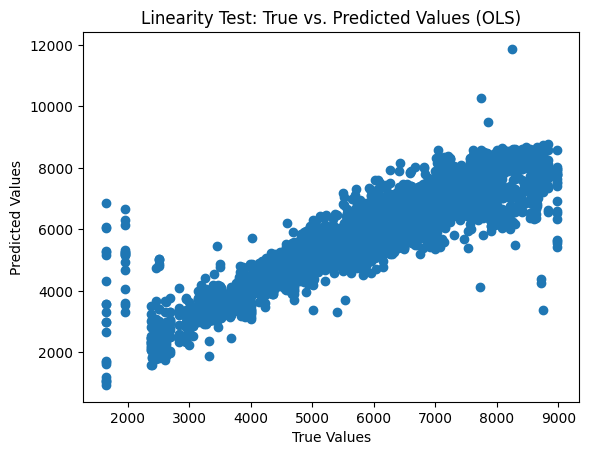

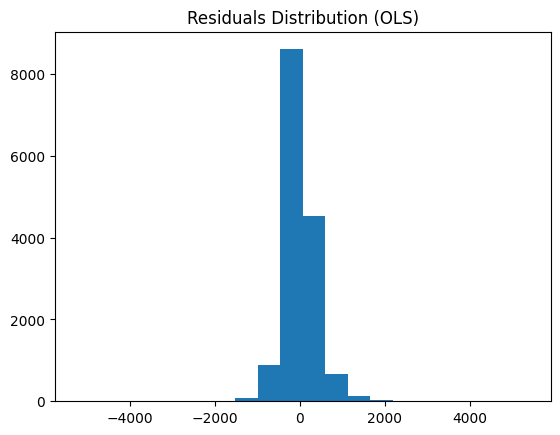

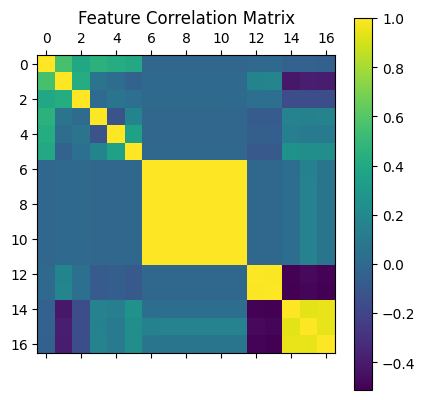

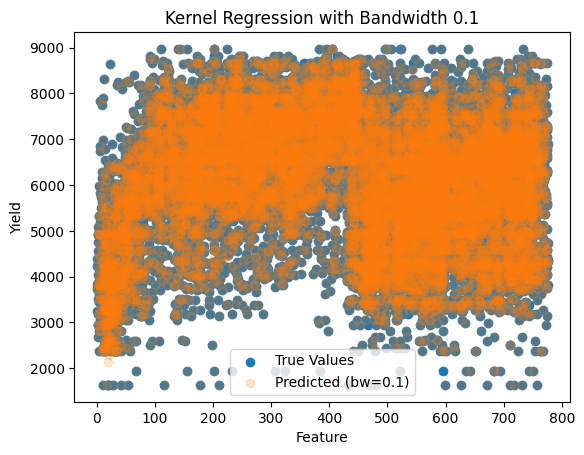

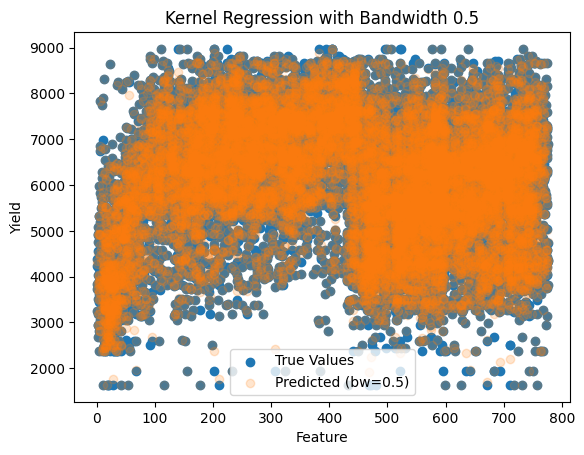

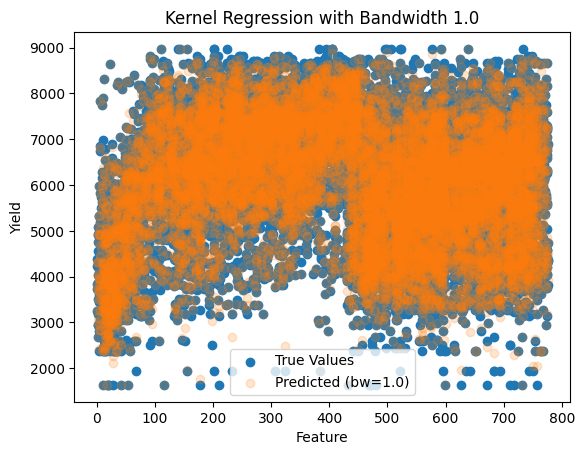

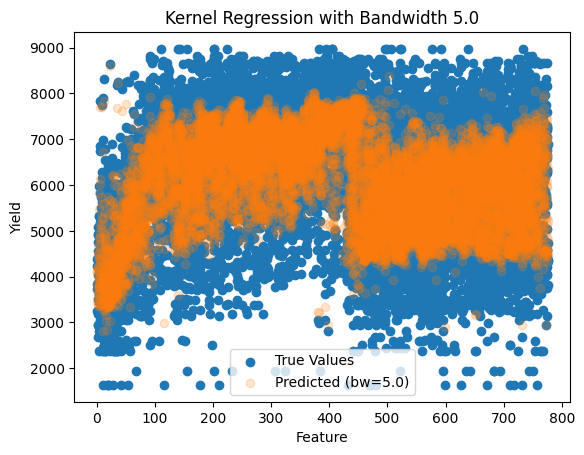

In [11]:
plt.scatter(y_train, Y_pred_ols)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Linearity Test: True vs. Predicted Values (OLS)")
plt.show()

residuals_ols = y_train - Y_pred_ols
plt.hist(residuals_ols, bins=20)
plt.title("Residuals Distribution (OLS)")
plt.show()

correlation_matrix = pd.DataFrame(x_train).corr()
plt.matshow(correlation_matrix)
plt.title("Feature Correlation Matrix")
plt.colorbar()
plt.show()

bandwidths = [0.1, 0.5, 1.0, 5.0]
for bw in bandwidths:
    Y_pred_bw = KernelRegression(x_train, y_train, x_train, bw)
    plt.scatter(x_train[:, 0], y_train, label="True Values")
    plt.scatter(x_train[:, 0], Y_pred_bw, label=f"Predicted (bw={bw})",alpha=0.2)
    plt.xlabel("Feature")
    plt.ylabel("Yield")
    plt.title(f"Kernel Regression with Bandwidth {bw}")
    plt.legend()
    plt.show()


In [ ]:

bandwidths = [0.1, 0.5, 1.0, 5.0]
for bw in bandwidths:
    Y_pred_bw = KernelRegression(x_train, y_train, x_train, bw)
    plt.scatter(x_train[:, 0], y_train, label="True Values")
    plt.scatter(x_train[:, 0], Y_pred_bw, label=f"Predicted (bw={bw})",alpha=0.2)
    plt.xlabel("Feature")
    plt.ylabel("Yield")
    plt.title(f"Kernel Regression with Bandwidth {bw}")
    plt.legend()
    plt.show()